# Importar librerías + data

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers, models, utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [44]:
data = pd.read_parquet('datasets/teams/battlelog_train.parquet')

# cambiar dtypes a categoricos

data['event_mode'] = data['event_mode'].astype('category')
data['event_map'] = data['event_map'].astype('category')
data['battle_player1_brawler_name'] = data['battle_player1_brawler_name'].astype('category')
data['battle_player2_brawler_name'] = data['battle_player2_brawler_name'].astype('category')
data['battle_player3_brawler_name'] = data['battle_player3_brawler_name'].astype('category')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537536 entries, 0 to 537535
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   winner                       537536 non-null  bool    
 1   event_mode                   537536 non-null  category
 2   event_map                    537536 non-null  category
 3   battle_player1_brawler_name  537536 non-null  category
 4   battle_player2_brawler_name  537536 non-null  category
 5   battle_player3_brawler_name  537536 non-null  category
 6   battle_power                 537536 non-null  float64 
 7   avg_brawler_trophies         537536 non-null  float64 
 8   brawler_trophies_min         537536 non-null  float64 
 9   brawler_trophies_max         537536 non-null  float64 
 10  avg_trophies                 537536 non-null  float64 
 11  trophies_min                 537536 non-null  float64 
 12  trophies_max                 537536 non-null

Limpiar categorías

In [45]:
def clean_categories(df, col, prefix):
	"""
	Función para convertir las etiquetas de texto a valores numéricos
	y luego convertir los valores numéricos a "one-hot encoding"
	"""	

	x = df.drop([col], axis=1)
	y = df[col]

	le = LabelEncoder()
	y = le.fit_transform(y)

	# Convertir los valores numéricos a "one-hot encoding"
	y = utils.to_categorical(y)

	# unir el dataframe con las categorias codificadas
	df_encoded = pd.concat([x, pd.DataFrame(y, columns=[prefix + '_' + c for c in le.classes_])], axis=1)

	return df_encoded
    
data = clean_categories(data, 'event_mode', 'EV')
data = clean_categories(data, 'event_map', 'MP')
data = clean_categories(data, 'battle_player1_brawler_name', 'P1')
data = clean_categories(data, 'battle_player2_brawler_name', 'P2')
data = clean_categories(data, 'battle_player3_brawler_name', 'P3')
data

,winner,battle_power,avg_brawler_trophies,brawler_trophies_min,brawler_trophies_max,avg_trophies,trophies_min,trophies_max,avg_highestTrophies,highestTrophies_min,...,P3_SAM,P3_SANDY,P3_SHELLY,P3_SPIKE,P3_SPROUT,P3_SQUEAK,P3_STU,P3_SURGE,P3_TARA,P3_TICK
0,True,33.0,6.918036,6.715383,7.084226,10.888228,10.505451,11.263553,10.888352,10.505999,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,False,33.0,6.996376,6.976348,7.035269,10.808427,10.642874,11.074343,10.845102,10.643280,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,True,33.0,6.987798,6.966967,7.028201,10.808427,10.642874,11.074343,10.845102,10.643280,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,False,32.0,6.841972,6.813445,6.857514,10.857575,10.588880,11.074343,10.892366,10.588880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,False,32.0,6.784457,6.651572,6.864848,10.857575,10.588880,11.074343,10.892366,10.588880,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537531,False,29.0,6.450997,6.437752,6.472346,10.439298,10.422073,10.465757,10.439991,10.422073,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537532,False,32.0,6.428644,6.216606,6.541030,10.222232,10.073821,10.330942,10.257718,10.074664,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
537533,False,33.0,6.721024,6.703188,6.741701,10.357288,10.290381,10.442522,10.357806,10.290924,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
537534,False,33.0,6.648121,6.593045,6.674561,10.451946,9.962464,10.643924,10.451946,9.962464,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Generar test split

In [128]:
seed=14690

train, test = train_test_split(data, test_size = 0.7, random_state=seed)

print(str(train.shape) + " train samples")
print(str(test.shape) + " test samples")

(161260, 269) train samples
(376276, 269) test samples


In [ ]:
# En lugar de agregar más capas, te sugiero que consideres algunas de estas opciones para mejorar la precisión de tu modelo de redes neuronales:

# Aumentar la cantidad de datos de entrenamiento: Una mayor cantidad de datos de entrenamiento puede ayudar a mejorar 
# la precisión de tu modelo. Podrías considerar agregar más datos si están disponibles. OK

# Normalizar los datos: Normalizar los datos puede ayudar a estandarizar las características y mejorar el rendimiento del modelo. 
# Asegúrate de normalizar tus datos antes de alimentarlos al modelo. ??

# Experimentar con diferentes funciones de activación: En lugar de usar la función de activación "relu" en todas las capas, 
# puedes experimentar con otras funciones de activación como "tanh" o "sigmoid" y ver cómo afecta el rendimiento del modelo.

# Utilizar técnicas de regularización: Las técnicas de regularización, como la eliminación de dropout o la regularización L1/L2, 
# pueden ayudar a evitar el sobreajuste del modelo y mejorar el rendimiento en el conjunto de datos de prueba.

# Ajustar los hiperparámetros: Experimenta con diferentes valores para los hiperparámetros, como la tasa de aprendizaje y el 
# tamaño del lote, para encontrar el mejor ajuste para tu modelo.

# Usar una función de pérdida diferente: Experimenta con diferentes funciones de pérdida para ver cómo afectan el rendimiento de tu modelo. 
# La función de pérdida "binary_crossentropy" es una buena opción para problemas de clasificación binaria como el que estás abordando.

# Considerar la inclusión de columnas categóricas: Si tus datos incluyen columnas categóricas, puedes considerar convertirlas en variables 
# dummy y agregarlas como características adicionales a tu modelo.

# Te sugiero que pruebes estas opciones y experimentes con diferentes configuraciones de modelo para encontrar la mejor combinación para 
# tu problema de predicción de resultados de juegos.

# Entrenando y comparando diferentes modelos

In [129]:
model_1 = models.Sequential([
    layers.Dense(268, input_dim=268, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_1.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_161 (Dense)           (None, 268)               72092     
                                                                 
 dense_162 (Dense)           (None, 64)                17216     
                                                                 
 dense_163 (Dense)           (None, 64)                4160      
                                                                 
 dense_164 (Dense)           (None, 1)                 65        
                                                                 
Total params: 93,533
Trainable params: 93,533
Non-trainable params: 0
_________________________________________________________________


In [130]:
model_2 = models.Sequential([
    layers.Dense(268, input_dim=268, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='tanh'),
    layers.Dense(1, activation='sigmoid')
])
model_2.summary()

Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_165 (Dense)           (None, 268)               72092     
                                                                 
 dense_166 (Dense)           (None, 64)                17216     
                                                                 
 dense_167 (Dense)           (None, 64)                4160      
                                                                 
 dense_168 (Dense)           (None, 64)                4160      
                                                                 
 dense_169 (Dense)           (None, 1)                 65        
                                                                 
Total params: 97,693
Trainable params: 97,693
Non-trainable params: 0
_________________________________________________________________


In [131]:
model_3 = models.Sequential([
    layers.Dense(268, input_dim=268, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='sigmoid'),
    layers.Dense(1, activation='sigmoid')
])
model_3.summary()

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_170 (Dense)           (None, 268)               72092     
                                                                 
 dense_171 (Dense)           (None, 64)                17216     
                                                                 
 dense_172 (Dense)           (None, 64)                4160      
                                                                 
 dense_173 (Dense)           (None, 64)                4160      
                                                                 
 dense_174 (Dense)           (None, 1)                 65        
                                                                 
Total params: 97,693
Trainable params: 97,693
Non-trainable params: 0
_________________________________________________________________


Compilando modelos

In [132]:
optimizer = 'adam'
loss = 'binary_crossentropy'
metrics = ['accuracy', 'mse', 'FalseNegatives', 'FalsePositives', 'TrueNegatives', 'TruePositives']

def compile_model(model):
    model.compile(
        optimizer=optimizer,
        loss=loss,
        metrics=metrics
    )

model_list = [model_1, model_2, model_3]

for model in model_list:
    compile_model(model)

Entrenando modelos

In [133]:
def train_models(model_list, train, epochs=1000, verbose=False):
	history = []
	for model in model_list:
		print('Iniciando entrenamiento ' + model)
		history.append(model.fit(train.drop(['winner'], axis=1), train['winner'], epochs=epochs, verbose=verbose))
		print('Entrenamiento finalizado ' + model)
	return history

train_models(model_list, train)

# historial_1 = model_1.fit(train.drop(['winner'], axis=1), train['winner'], epochs=1000, verbose=False)
# historial_2 = model_2.fit(train.drop(['winner'], axis=1), train['winner'], epochs=1000, verbose=False)
# historial_3 = model_3.fit(train.drop(['winner'], axis=1), train['winner'], epochs=1000, verbose=False)

In [ ]:
historial_1

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


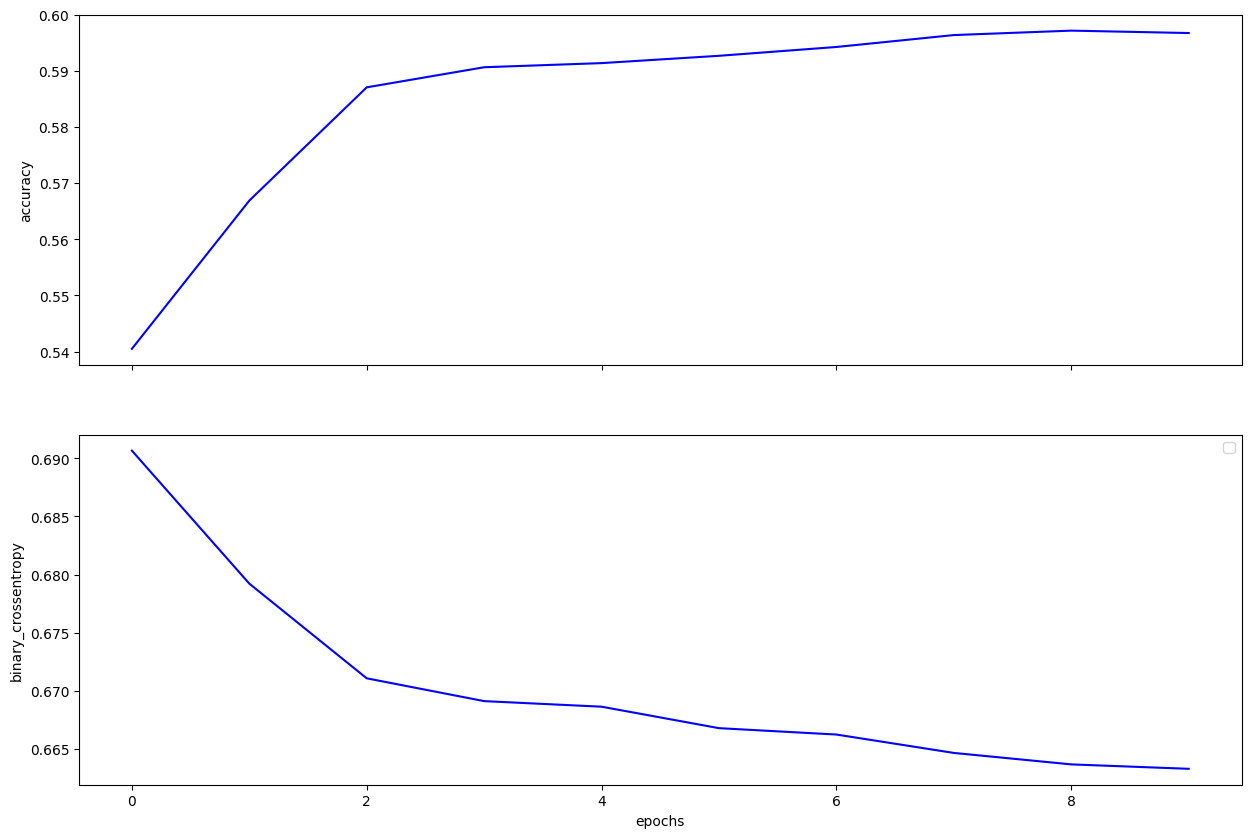

In [ ]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(15, 10))

ax[0].set_ylabel("accuracy")
ax[0].plot(historial_1.history["accuracy"], color='blue', label='two hidden relu layers')
ax[0].plot(historial_2.history["accuracy"], color='red', label='two hidden relu layers + tanh')
ax[0].plot(historial_3.history["accuracy"], color='green', label='two hidden relu layers + sigmoid')

ax[1].set_xlabel("epochs")
ax[1].set_ylabel("binary_crossentropy")
ax[1].plot(historial_1.history["loss"], color='blue', label='two hidden relu layers')
ax[1].plot(historial_2.history["loss"], color='red', label='two hidden relu layers + tanh')
ax[1].plot(historial_3.history["loss"], color='green', label='two hidden relu layers + sigmoid')

plt.legend()

plt.show()

In [ ]:
# resultado = model.predict([100.0])